# Machine Learning - 2nd Evaluation Project Phase

### 3) Loan Status Approval Prediction Project 

-- Project Description:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.


-- Feature Information:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases.

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions.

3.	Married - This refers to applicant being in a state of matrimony.

4.	Dependents - This refres to persons who depends on the applicants for survival.

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university.

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer.

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant.

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


-- Task:

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [48]:
loan = pd.read_csv("C:/Users/user/Downloads/loan_prediction.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan.shape

(614, 13)

In [4]:
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
loan.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
#Checking for null values
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
columns_list = ['Gender','Self_Employed','Married']
for column in columns_list:
    mode = loan[column].mode()[0]
    loan[column].fillna(mode,inplace=True)

In [50]:
loan.dropna(subset=['Dependents','LoanAmount','Loan_Amount_Term','Credit_History'],inplace = True)

In [9]:
#Again Checking for null values
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
loan.shape

(517, 13)

-- Successfully removed null values for those columns for which we do not know what values should be filled..and successfully replaced null values for those columns with mode (Mostly categorical columns)..

In [11]:
#Checking for Duplicates
loan.duplicated().sum()

0

-- No duplicate values present in the dataset..

In [12]:
#Checking for dataset info
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            517 non-null    object 
 1   Gender             517 non-null    object 
 2   Married            517 non-null    object 
 3   Dependents         517 non-null    object 
 4   Education          517 non-null    object 
 5   Self_Employed      517 non-null    object 
 6   ApplicantIncome    517 non-null    int64  
 7   CoapplicantIncome  517 non-null    float64
 8   LoanAmount         517 non-null    float64
 9   Loan_Amount_Term   517 non-null    float64
 10  Credit_History     517 non-null    float64
 11  Property_Area      517 non-null    object 
 12  Loan_Status        517 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 56.5+ KB


In [51]:
#Dropping the Loan_Id column as it does not affect the prediction process
loan.drop('Loan_ID', axis=1, inplace = True)

In [52]:
#Checking the number of unique values of each column
loan.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      432
CoapplicantIncome    243
LoanAmount           194
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [15]:
#Now we split the data into numerical and categorical columns
cat_col = []
for i in loan.dtypes.index:
    if loan.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical Variables: ",cat_col)

Categorical Variables:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [16]:
num_col = []
for i in loan.dtypes.index:
    if loan.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Variables: ",num_col)

Numerical Variables:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [17]:
#Checking unique variables in categorical columns
for i in cat_col:
    print(f"Categories in {i} variable: ",end=" ")
    print(loan[i].unique())

Categories in Gender variable:  ['Male' 'Female']
Categories in Married variable:  ['Yes' 'No']
Categories in Dependents variable:  ['1' '0' '2' '3+']
Categories in Education variable:  ['Graduate' 'Not Graduate']
Categories in Self_Employed variable:  ['No' 'Yes']
Categories in Property_Area variable:  ['Rural' 'Urban' 'Semiurban']
Categories in Loan_Status variable:  ['N' 'Y']


### Univariate Analysis 

In [18]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,517.000000,517.000000,517.000000,517.000000,517.000000
mean,5541.632495,1555.657485,146.145068,341.825919,0.856867
std,6472.488133,2546.176498,84.920461,64.611485,0.350548
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2895.000000,0.000000,100.000000,360.000000,1.000000
50%,3833.000000,1126.000000,128.000000,360.000000,1.000000
75%,5821.000000,2250.000000,168.000000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


-- Take-Aways:

1) The Average income of the client applying for the loan is around 5542 dollars.
2) The Average income of the co-applicant is around 1556 dollars.
3) The Average amount of money an applicant owe at any given time(i.e Loan Amount) is 146 dollars.
4) The most opted Loan term amongst all the applicants is 360 days.
5) The Average Credit History of the applicants is around 0.85 out of 1.0 (pretty good scores of the applicants)
6) There might be presence of outliers in the numerical columns, as the difference between the Third quartile and the max value is high (especially in ApplicantIncome and CoapplicantIncome).
7) Most of the columns are right skewed (positively skewed) as mean is greater than median.

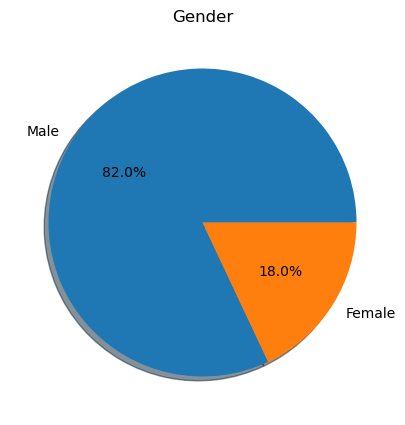

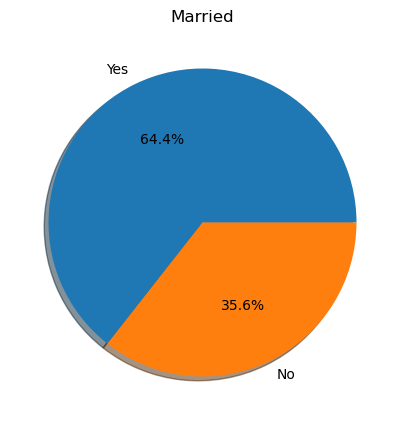

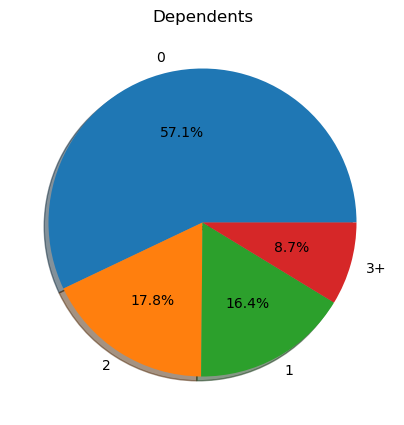

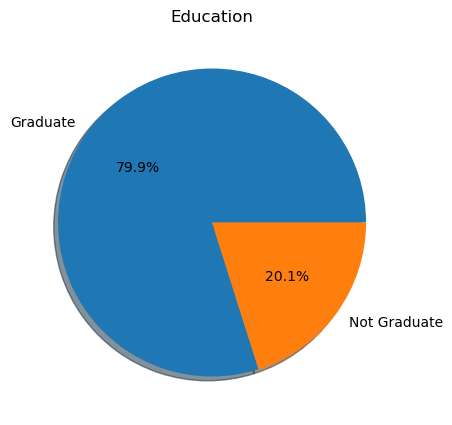

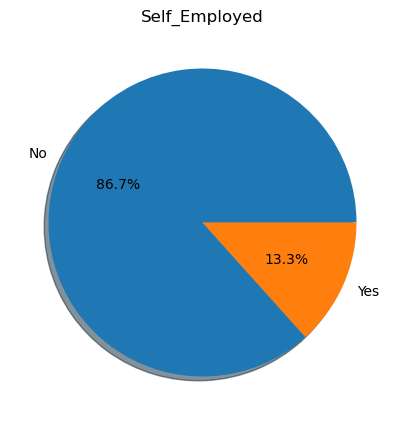

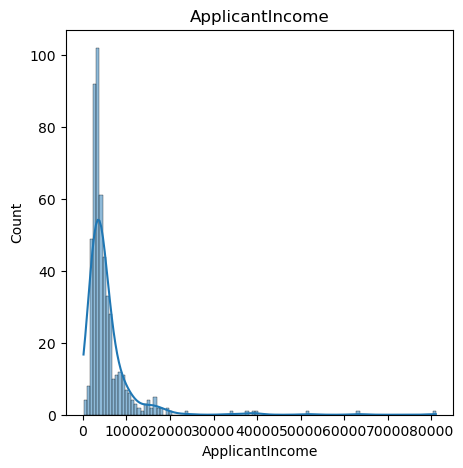

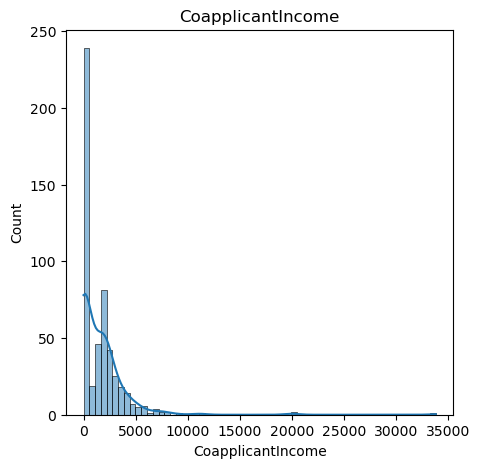

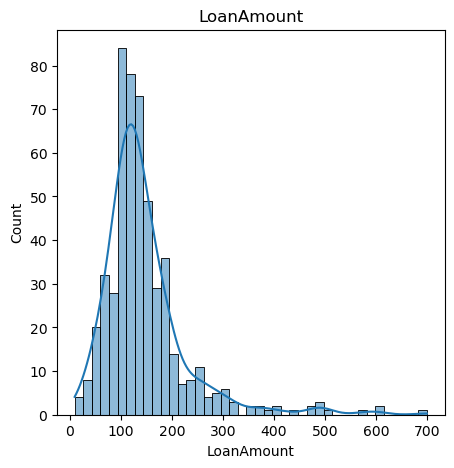

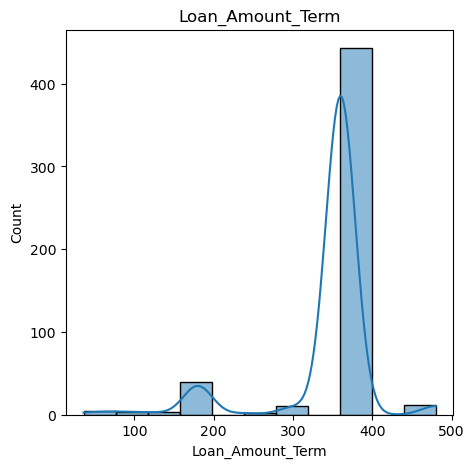

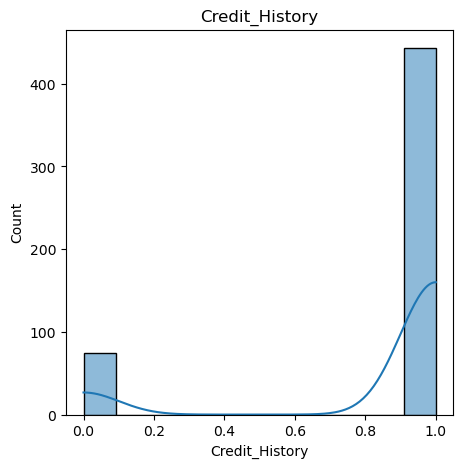

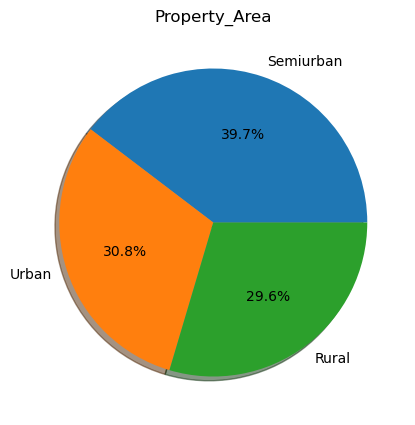

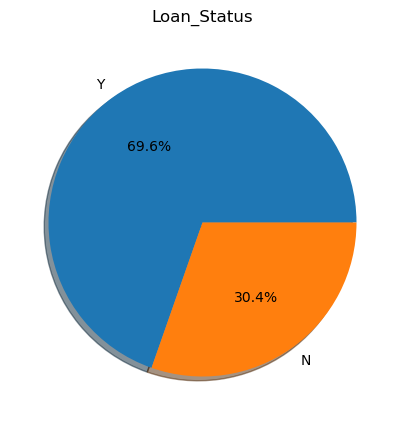

In [19]:
# Analysing each column
for column in loan:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if loan[column].dtypes == "object":
        sizes = loan[column].value_counts()
        plt.pie(sizes.values,labels=sizes.index,autopct = '%1.1f%%',shadow=True)
    elif loan[column].dtypes != "object":
        sns.histplot(x = column,data = loan,kde=True)

### Bivariate Analysis 

In [20]:
# Relationship between Categorical features and dependent feature
categorical_features = [feature for feature in loan.columns if ((loan[feature].dtypes=='O') and (feature not in ['Loan_Status']))]
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

<Figure size 1500x3000 with 0 Axes>

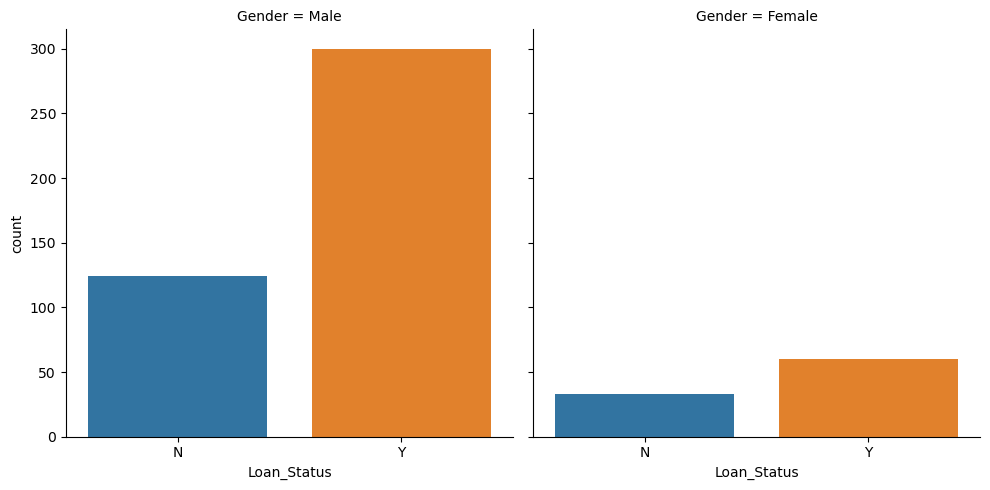

<Figure size 1500x3000 with 0 Axes>

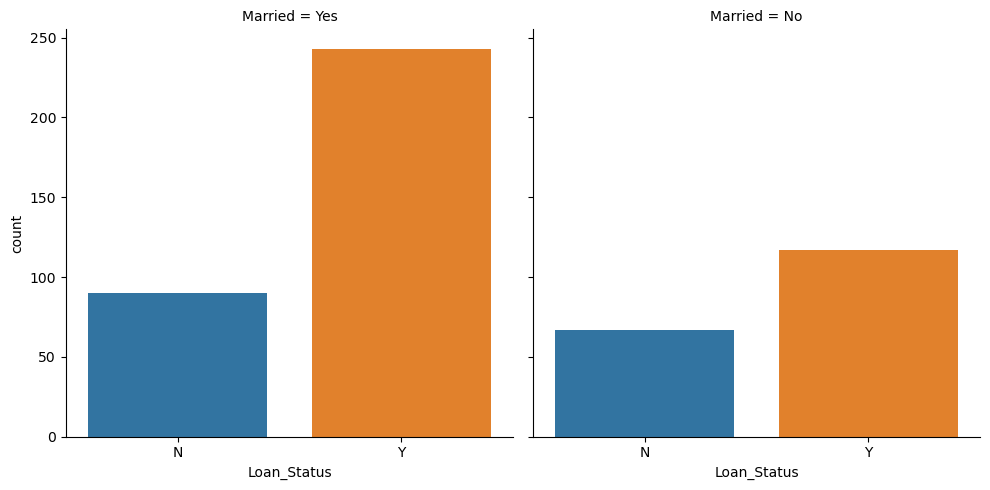

<Figure size 1500x3000 with 0 Axes>

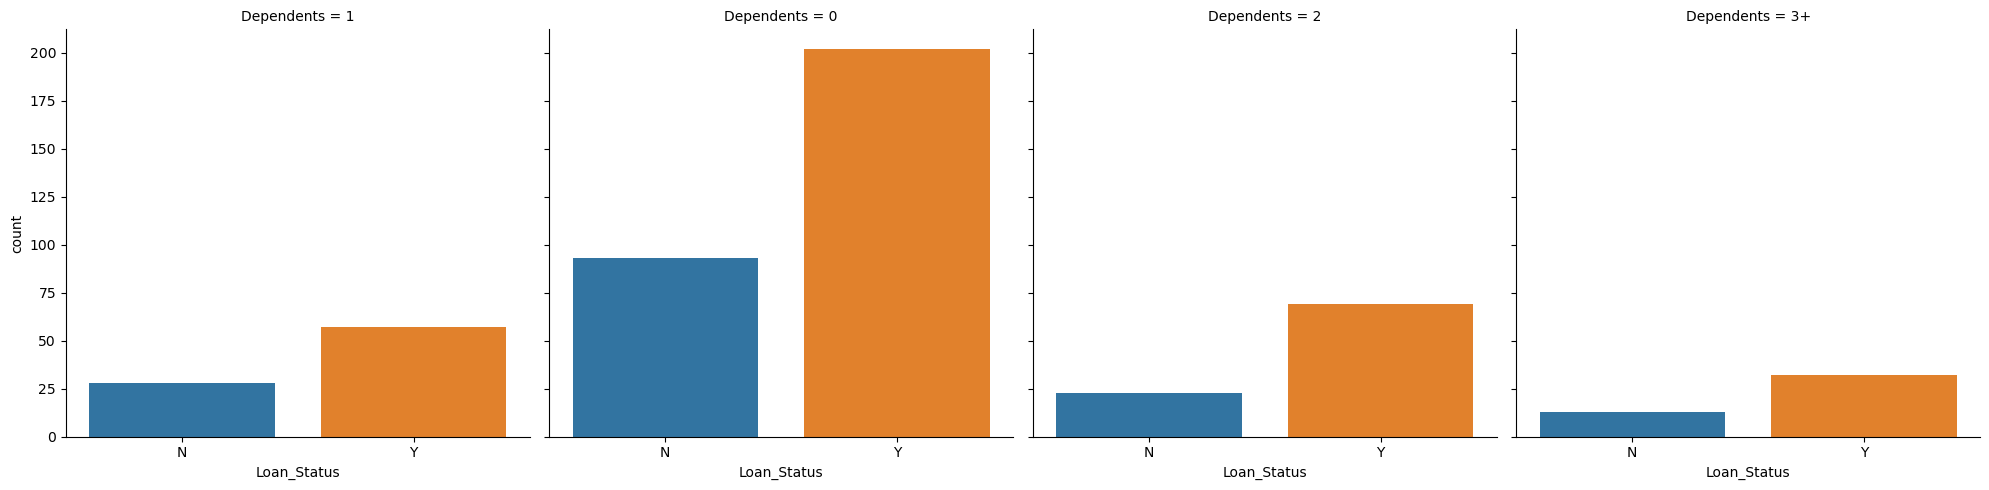

<Figure size 1500x3000 with 0 Axes>

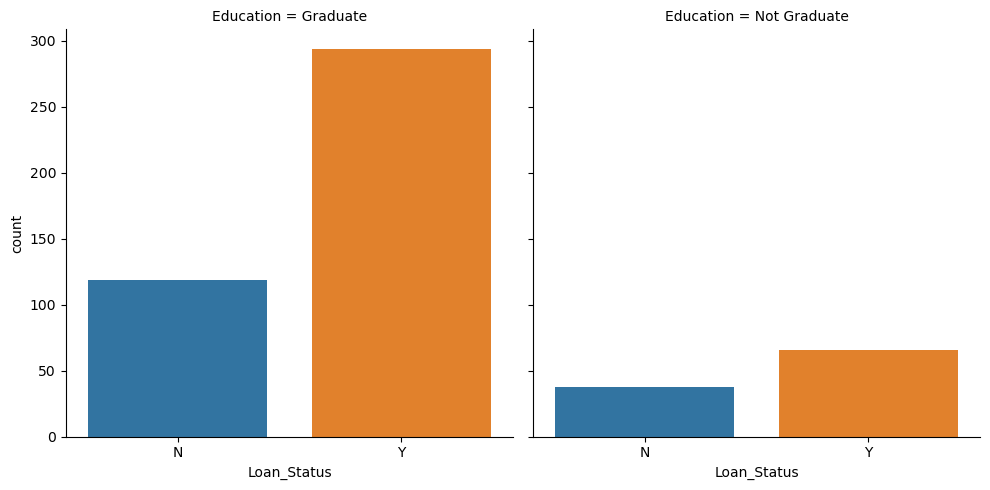

<Figure size 1500x3000 with 0 Axes>

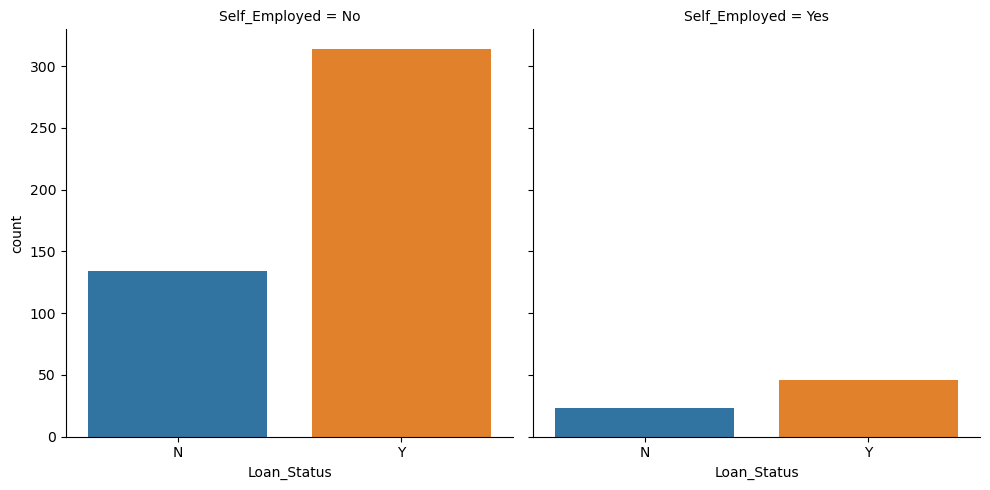

<Figure size 1500x3000 with 0 Axes>

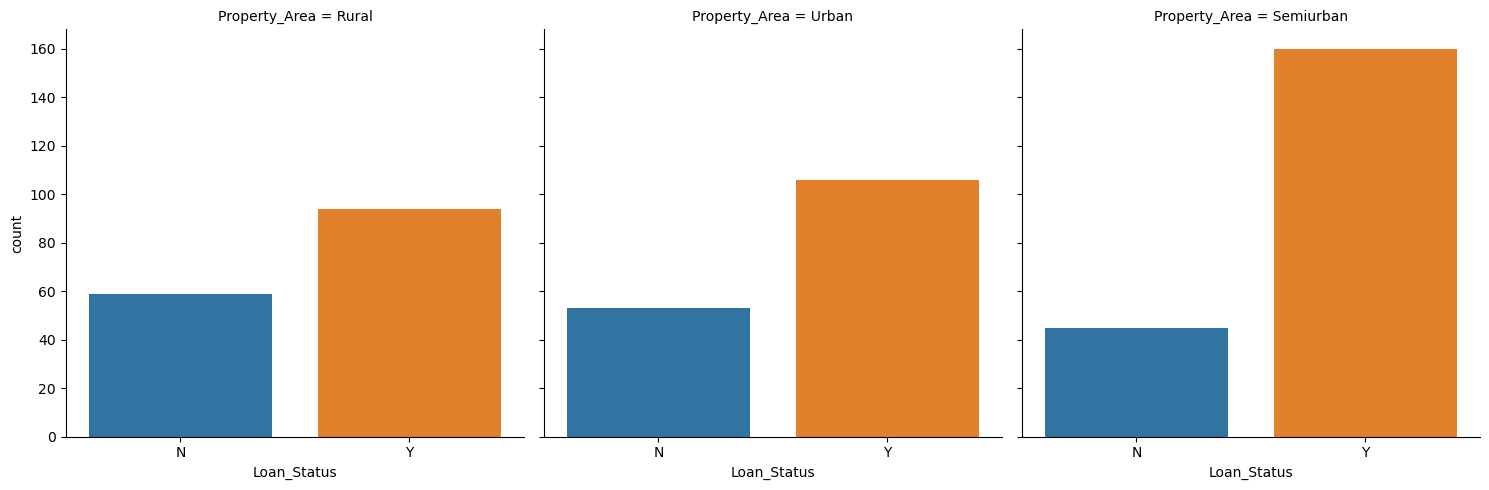

In [21]:
for categorical_feature in categorical_features:
    plt.figure(figsize=(15,30))
    sns.catplot(x='Loan_Status',col=categorical_feature,kind='count',data = loan)
plt.show()

In [22]:
for categorical_feature in categorical_features:
    print(loan.groupby(['Loan_Status',categorical_feature]).size())

Loan_Status  Gender
N            Female     33
             Male      124
Y            Female     60
             Male      300
dtype: int64
Loan_Status  Married
N            No          67
             Yes         90
Y            No         117
             Yes        243
dtype: int64
Loan_Status  Dependents
N            0              93
             1              28
             2              23
             3+             13
Y            0             202
             1              57
             2              69
             3+             32
dtype: int64
Loan_Status  Education   
N            Graduate        119
             Not Graduate     38
Y            Graduate        294
             Not Graduate     66
dtype: int64
Loan_Status  Self_Employed
N            No               134
             Yes               23
Y            No               314
             Yes               46
dtype: int64
Loan_Status  Property_Area
N            Rural             59
             Semiurb

In [24]:
#Relationship between Numerical features and dependent feature
numerical_features = [feature for feature in loan.columns if ((loan[feature].dtypes !='O') and (feature not in ['Loan_Status']))]
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

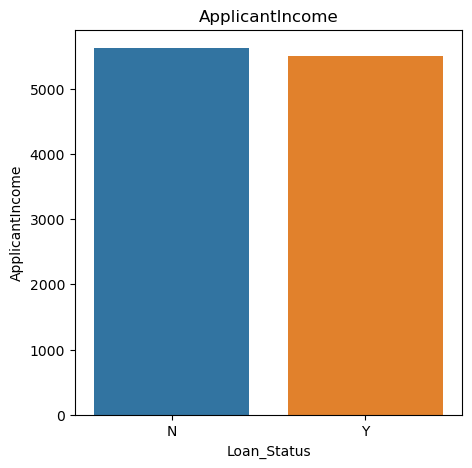

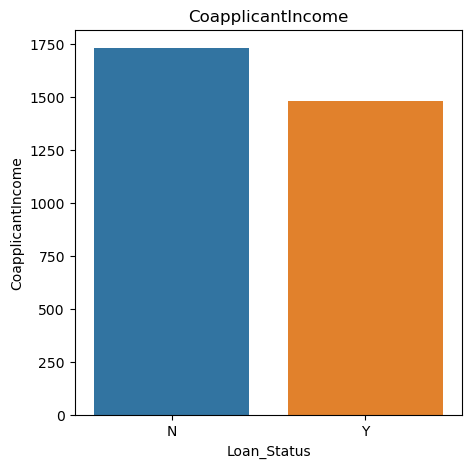

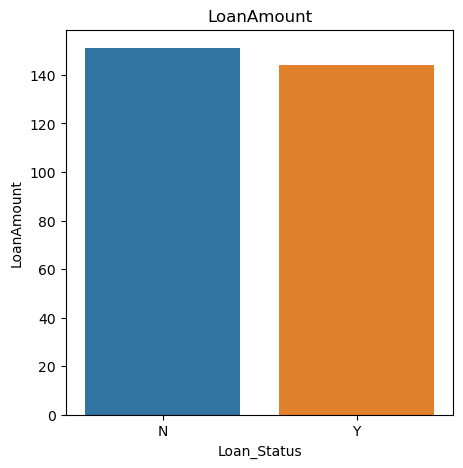

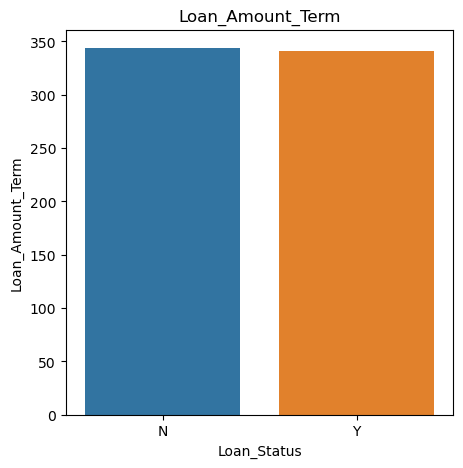

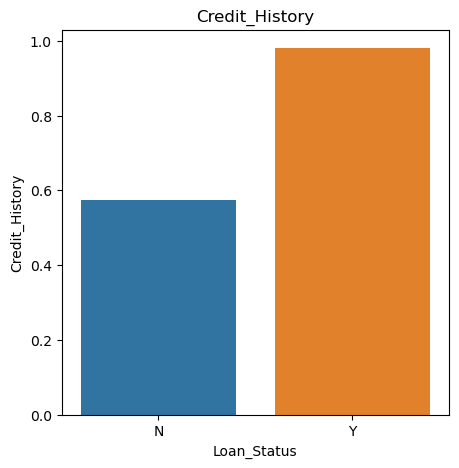

In [29]:
for column in loan:
    if loan[column].dtypes != "object":
        plt.figure(column, figsize = (5,5))
        sns.barplot(x = 'Loan_Status',y = column,data = loan,errorbar=None)
        plt.title(column)

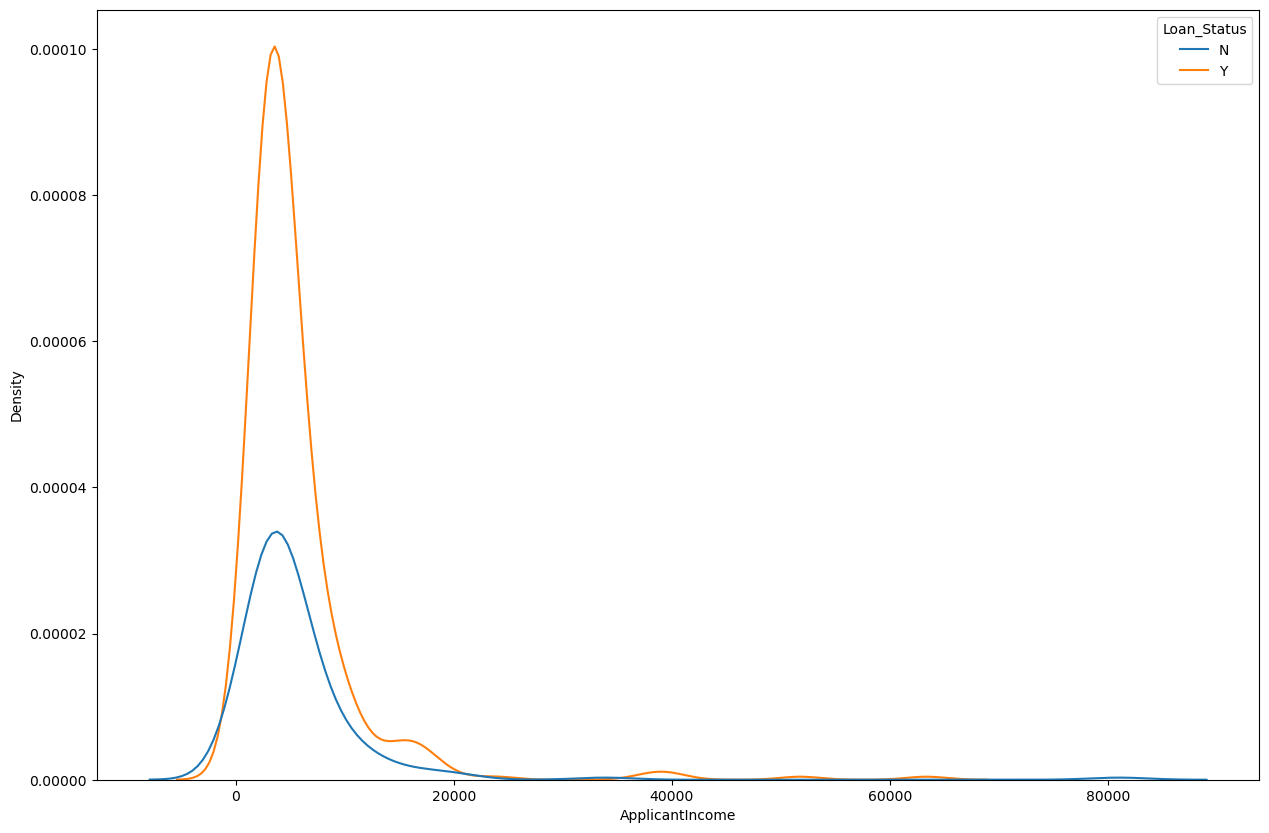

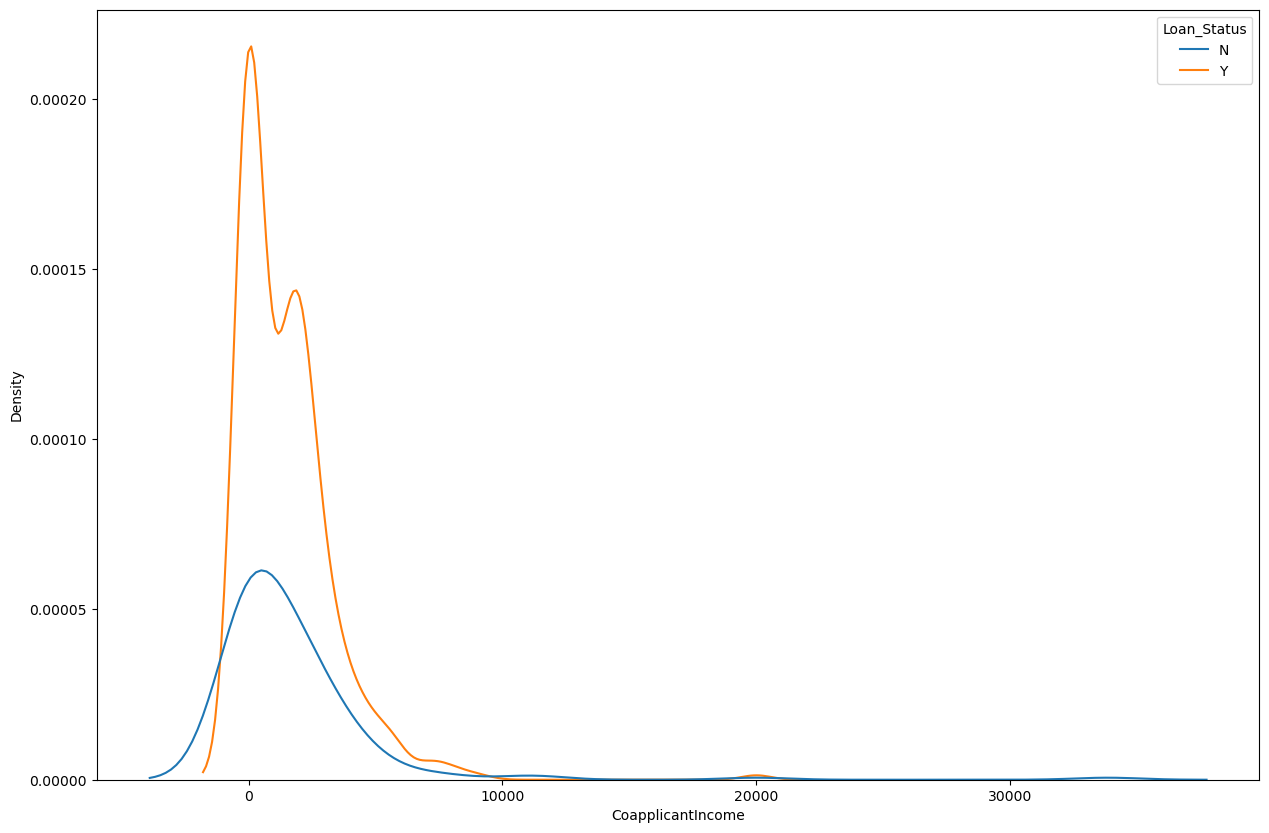

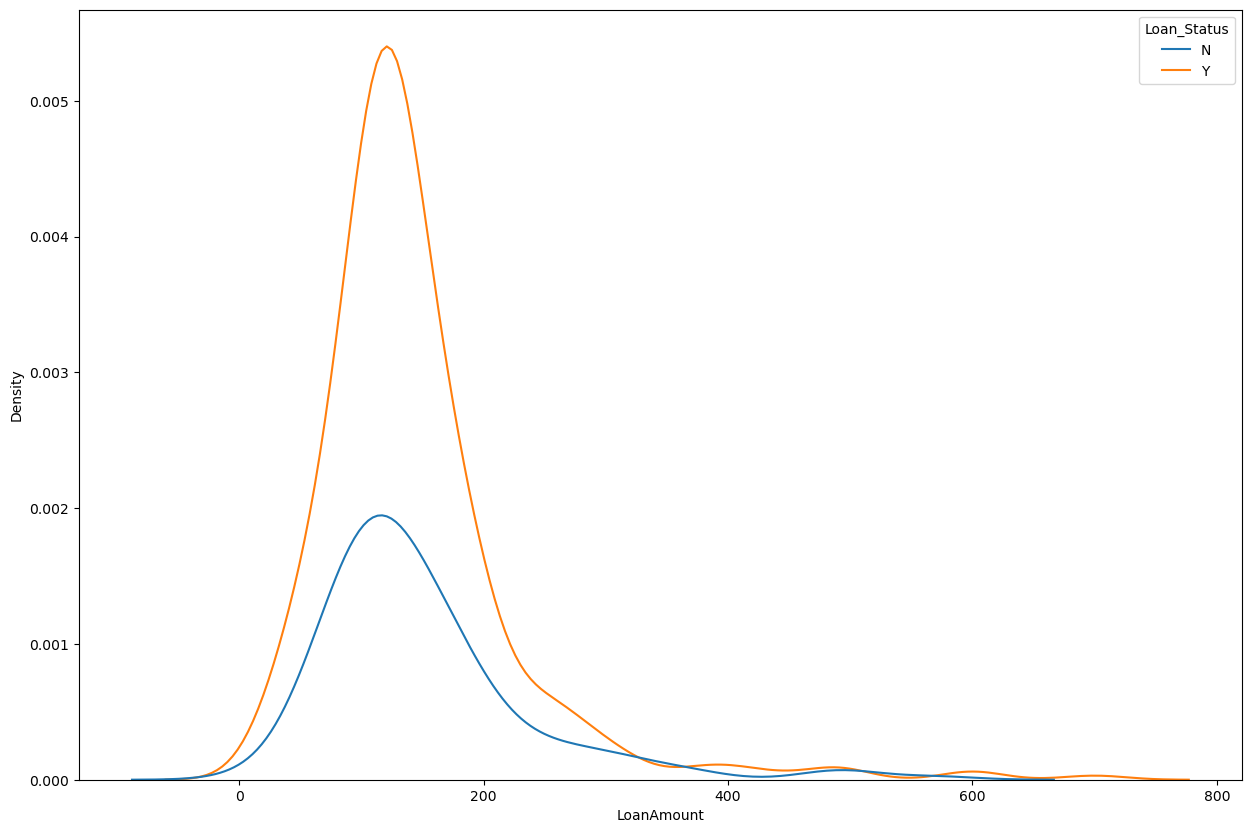

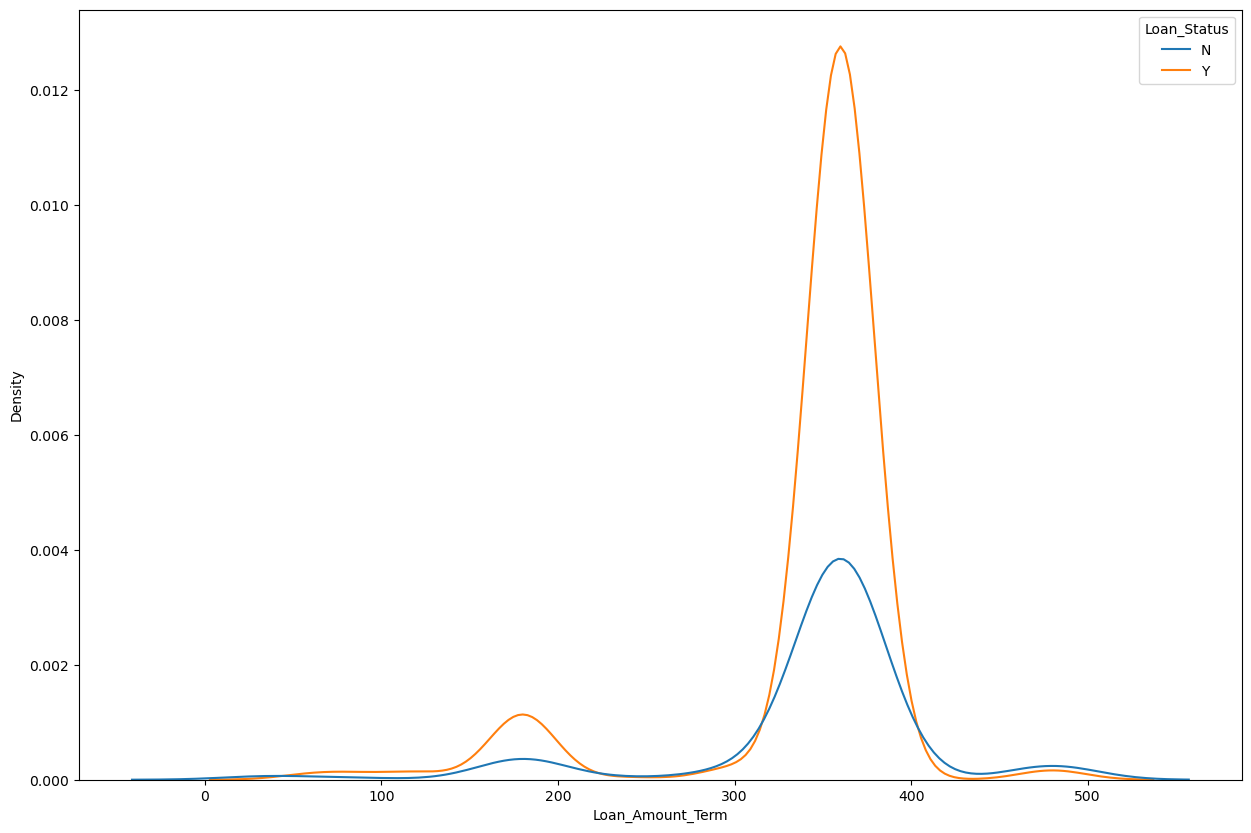

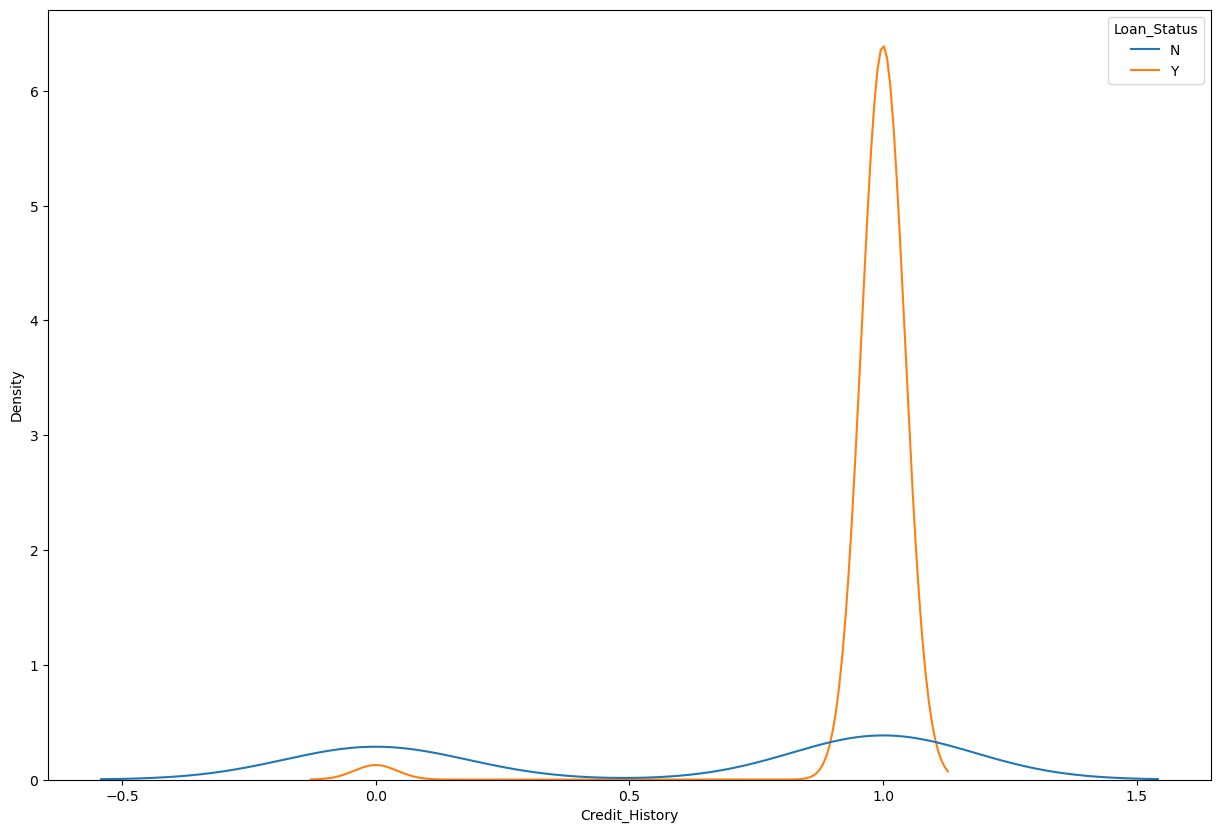

In [28]:
#Density plots for numerical features
for numerical_feature in numerical_features:
    plt.figure(figsize=(15,10))
    sns.kdeplot(x=numerical_feature,data = loan,hue='Loan_Status')
plt.show()

### Multivariate Analysis 

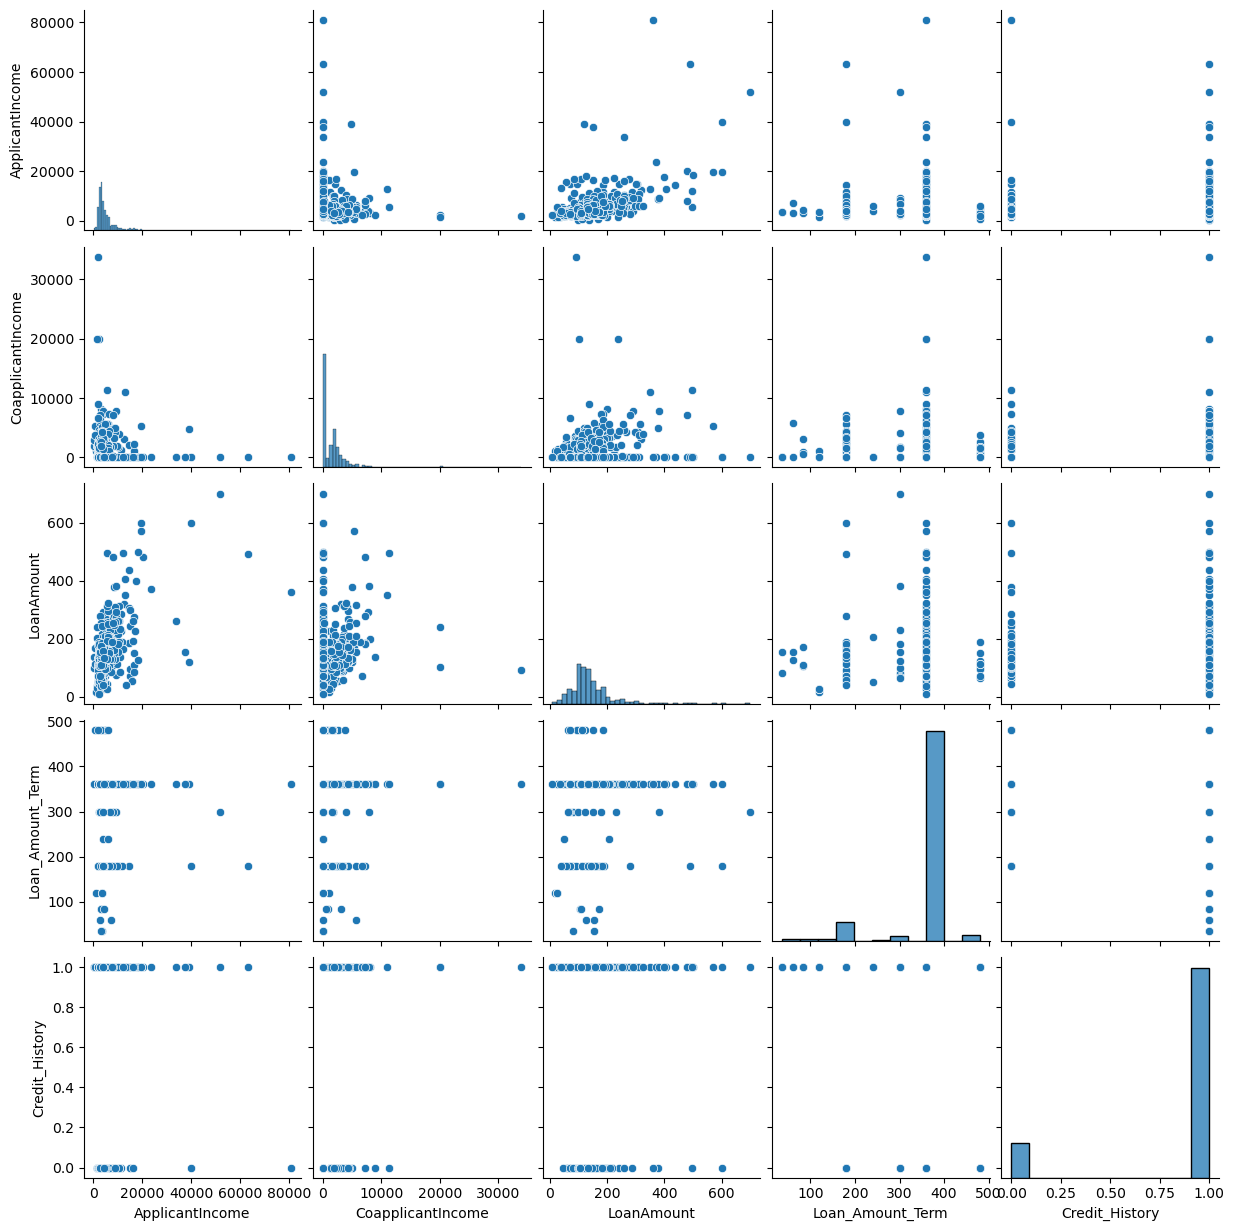

In [30]:
sns.pairplot(loan)

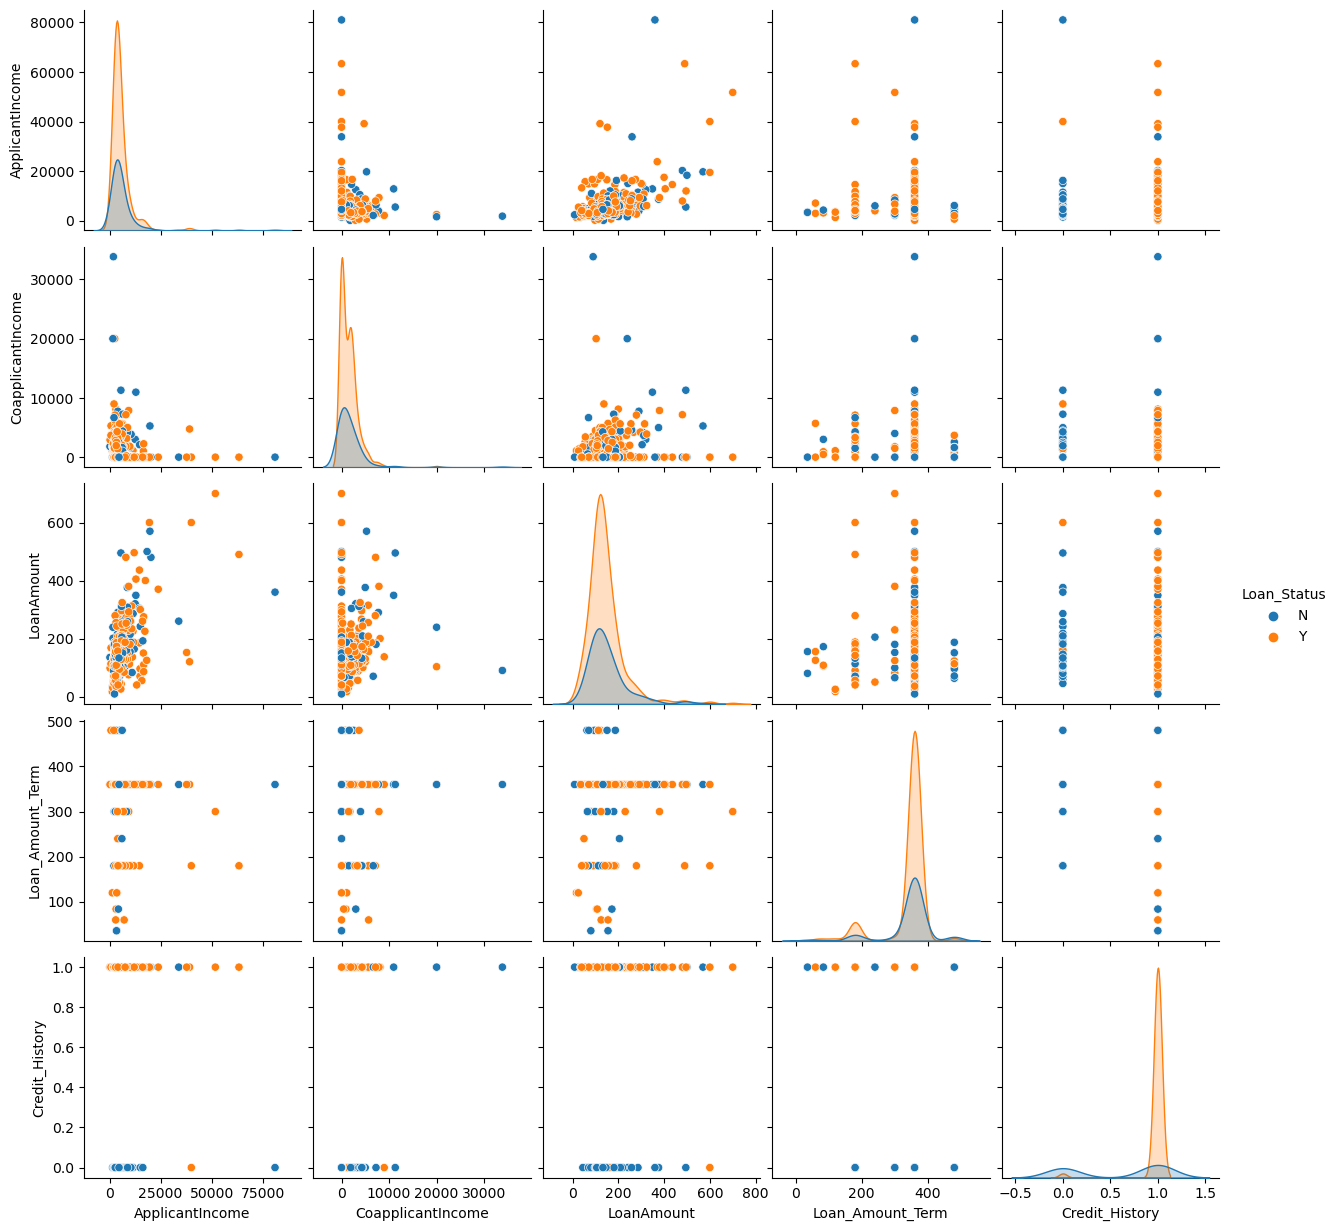

In [31]:
sns.pairplot(loan,hue = 'Loan_Status')

### Feature Engineering and Feature Selection 

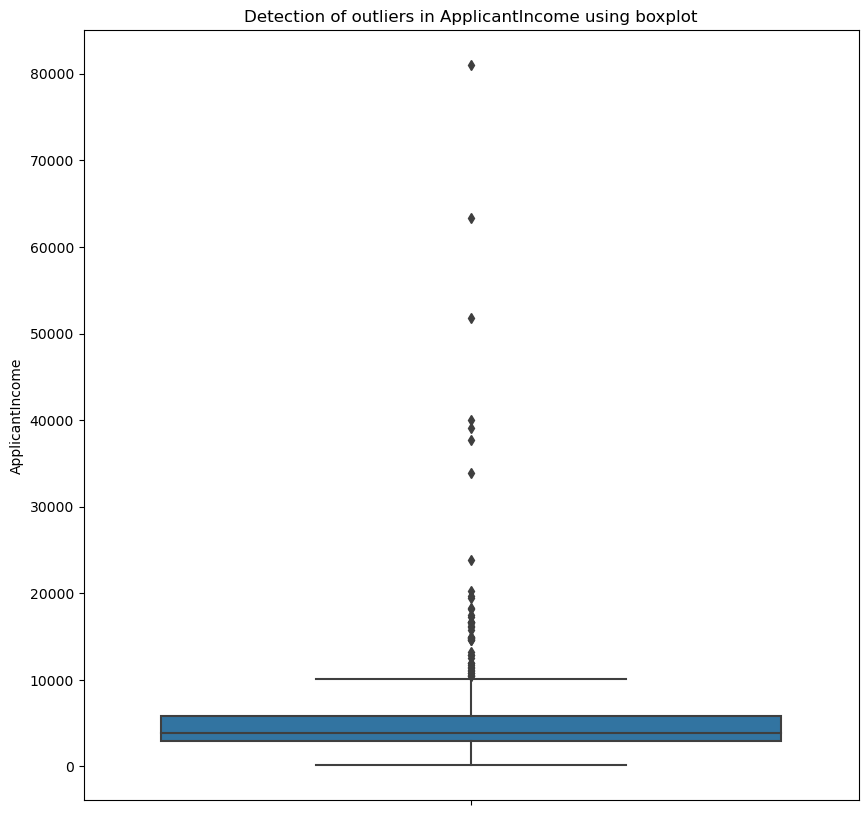

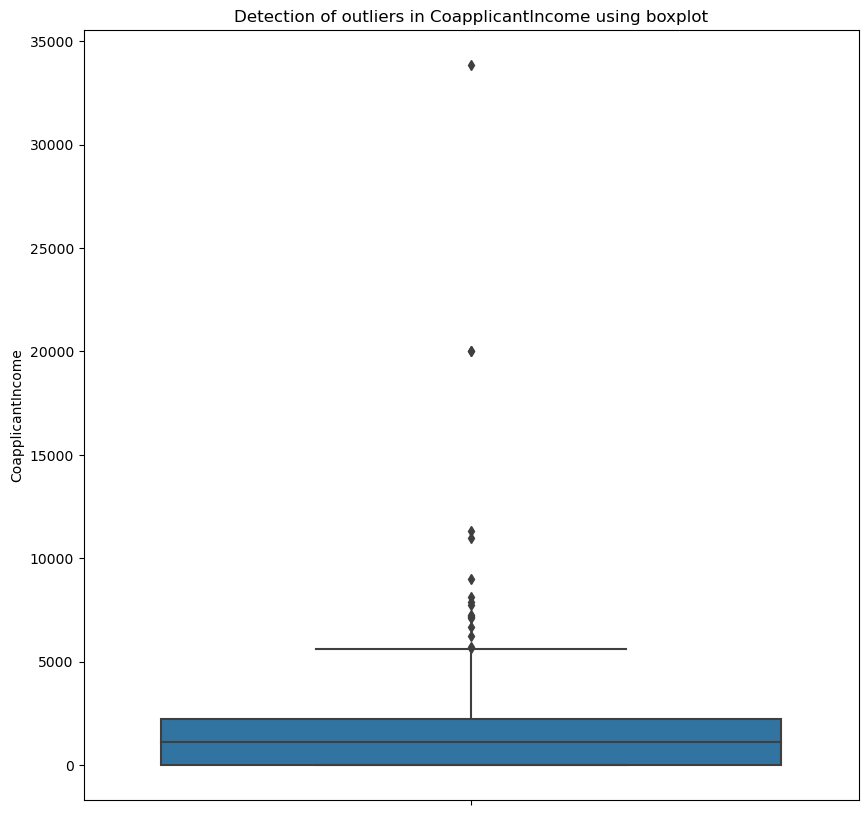

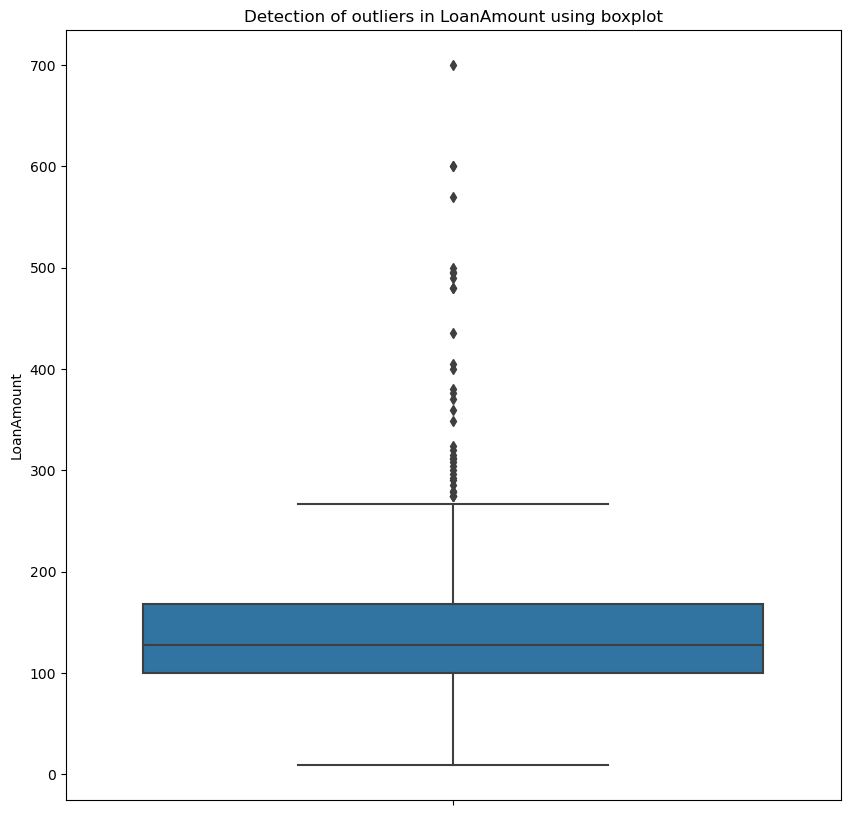

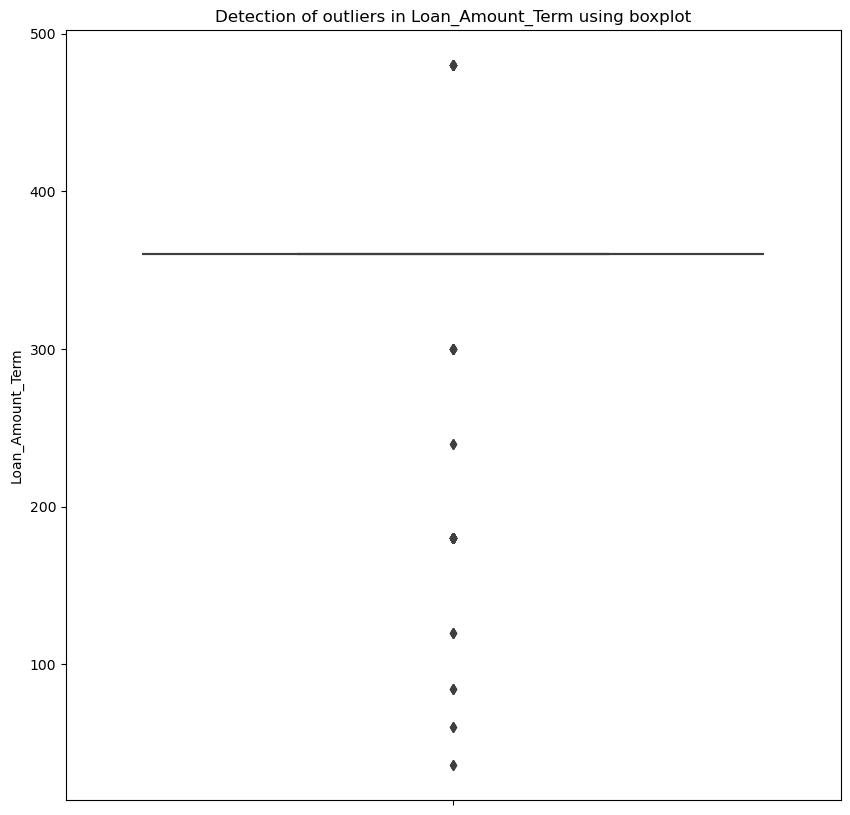

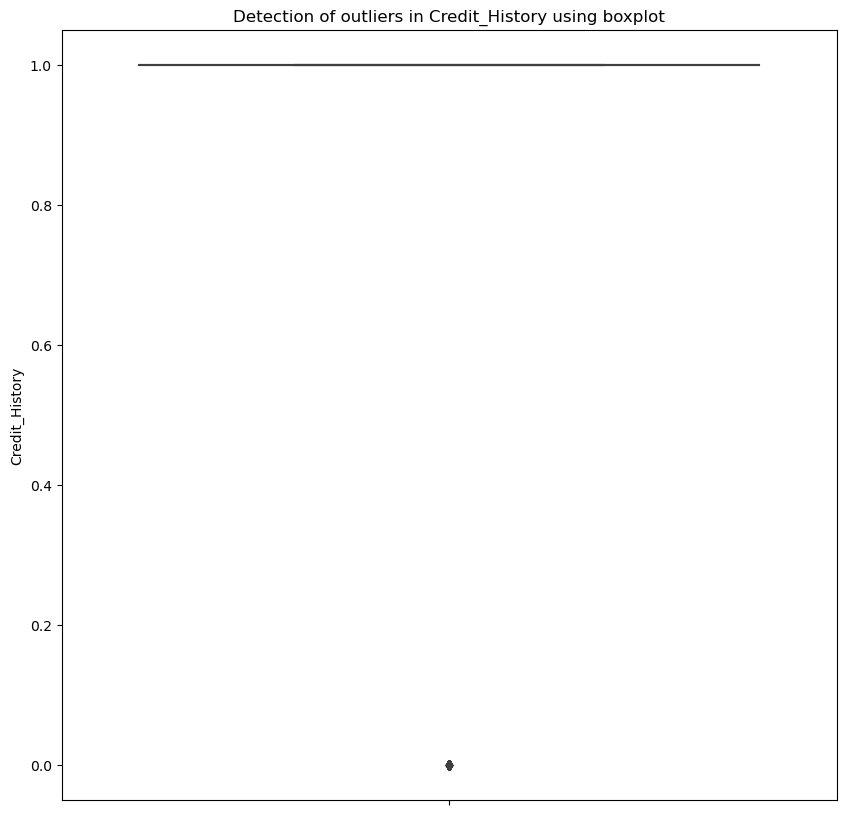

In [32]:
##Checking for outliers using boxplots and removing them if necessary
for numerical_feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(y=numerical_feature,data = loan)
    plt.title('Detection of outliers in {} using boxplot'.format(numerical_feature))
plt.show()

In [55]:
loan.groupby(['Loan_Status','ApplicantIncome']).size()

Loan_Status  ApplicantIncome
N            150                1
             1000               1
             1378               1
             1442               1
             1500               1
                               ..
Y            37719              1
             39147              1
             39999              1
             51763              1
             63337              1
Length: 458, dtype: int64

In [56]:
loan.groupby(['Loan_Status','CoapplicantIncome']).size()

Loan_Status  CoapplicantIncome
N            0.0                  79
             536.0                 1
             736.0                 1
             1000.0                1
             1250.0                1
                                  ..
Y            7210.0                1
             7873.0                1
             8106.0                1
             8980.0                1
             20000.0               1
Length: 257, dtype: int64

In [57]:
loan.groupby(['Loan_Status','LoanAmount']).size()

Loan_Status  LoanAmount
N            9.0           1
             35.0          1
             45.0          1
             46.0          1
             55.0          1
                          ..
Y            480.0         1
             490.0         1
             496.0         1
             600.0         2
             700.0         1
Length: 263, dtype: int64

In [58]:
loan.groupby(['Loan_Status','Loan_Amount_Term']).size()

Loan_Status  Loan_Amount_Term
N            36.0                  2
             84.0                  1
             180.0                12
             240.0                 1
             300.0                 5
             360.0               128
             480.0                 8
Y            60.0                  2
             84.0                  2
             120.0                 3
             180.0                28
             240.0                 1
             300.0                 5
             360.0               315
             480.0                 4
dtype: int64

In [59]:
loan.groupby(['Loan_Status','Credit_History']).size()

Loan_Status  Credit_History
N            0.0                67
             1.0                90
Y            0.0                 7
             1.0               353
dtype: int64

--There is no need to remove outliers in the dataset..

In [33]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


-- Correlation Analysis

In [34]:
#Correlation among numerical columns
loan_cor = loan.corr()
loan_cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.124310,0.570441,-0.063364,-0.028704
CoapplicantIncome,-0.124310,1.000000,0.157472,0.002263,-0.011741
LoanAmount,0.570441,0.157472,1.000000,0.022322,-0.021110
Loan_Amount_Term,-0.063364,0.002263,0.022322,1.000000,0.023540
Credit_History,-0.028704,-0.011741,-0.021110,0.023540,1.000000


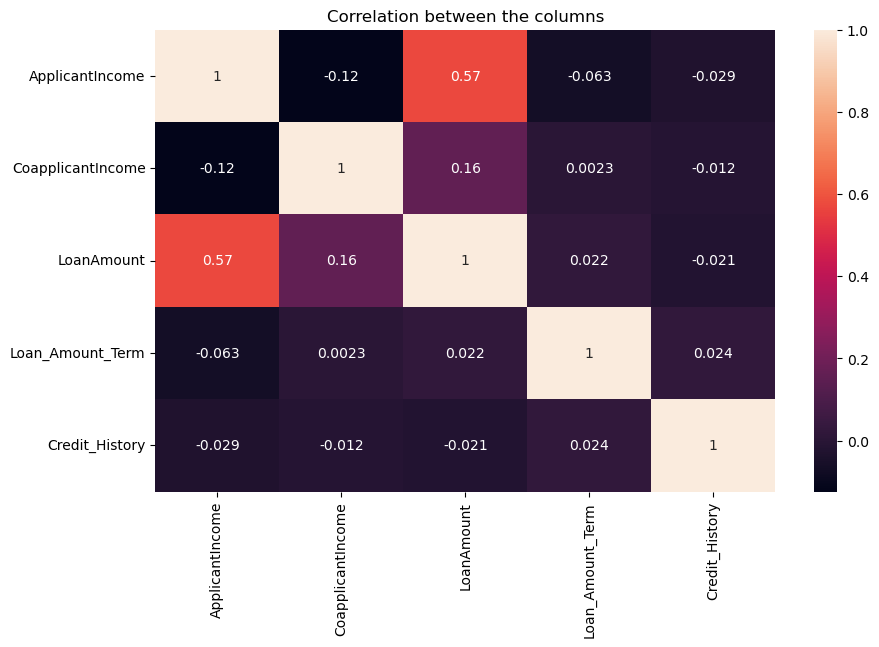

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(loan_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

In [53]:
#Checking Skewness of data
loan.skew()

ApplicantIncome      6.399195
CoapplicantIncome    5.960842
LoanAmount           2.584748
Loan_Amount_Term    -2.338244
Credit_History      -2.043956
dtype: float64

In [54]:
#Removing skewness
loan['ApplicantIncome'] = np.cbrt(loan['ApplicantIncome'])
loan['CoapplicantIncome'] = np.cbrt(loan['CoapplicantIncome'])
loan['LoanAmount'] = np.cbrt(loan['LoanAmount'])
loan['Loan_Amount_Term'] = np.cbrt(loan['Loan_Amount_Term'])
loan['Credit_History'] = np.cbrt(loan['Credit_History'])

In [61]:
#Again Checking for skewness
loan.skew()

ApplicantIncome      1.073591
CoapplicantIncome    0.165451
LoanAmount           0.745566
Loan_Amount_Term    -3.673143
Credit_History      -2.043956
dtype: float64

### Data Preprocessing 

In [62]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,2.551493,11.467457,5.039684,1.923241,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,2.434147,0.000000,4.041240,1.923241,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2.394004,13.310098,4.932424,1.923241,1.0,Urban,Y
4,Male,No,0,Graduate,No,2.629024,0.000000,5.204828,1.923241,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,2.599334,16.129163,6.439277,1.923241,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2.424995,0.000000,4.140818,1.923241,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,2.520525,0.000000,3.419952,1.780680,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,2.717121,6.214465,6.324704,1.923241,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,2.698320,0.000000,5.718479,1.923241,1.0,Urban,Y


-- Label Encoding

In [63]:
for i in cat_col:
    print(f"Categories in {i} variable: ",end=" ")
    print(loan[i].unique())

Categories in Gender variable:  ['Male' 'Female']
Categories in Dependents variable:  ['1' '0' '2' '3+']
Categories in Education variable:  ['Graduate' 'Not Graduate']
Categories in Property_Area variable:  ['Rural' 'Urban' 'Semiurban']


In [64]:
bool_columns = ['Married','Self_Employed']
for i in bool_columns:
    loan[i+'_new'] = loan[i].apply(lambda x : 1 if x == 'Yes' else 0)
    loan.drop(i,axis=1,inplace=True)

In [65]:
bool_column = ['Loan_Status']
for i in bool_column:
    loan[i+'_new'] = loan[i].apply(lambda x : 1 if x == 'Y' else 0)
    loan.drop(i,axis=1,inplace=True)

In [66]:
loan

,Gender,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Married_new,Self_Employed_new,Loan_Status_new
1,Male,1,Graduate,2.551493,11.467457,5.039684,1.923241,1.0,Rural,1,0,0
2,Male,0,Graduate,2.434147,0.000000,4.041240,1.923241,1.0,Urban,1,1,1
3,Male,0,Not Graduate,2.394004,13.310098,4.932424,1.923241,1.0,Urban,1,0,1
4,Male,0,Graduate,2.629024,0.000000,5.204828,1.923241,1.0,Urban,0,0,1
5,Male,2,Graduate,2.599334,16.129163,6.439277,1.923241,1.0,Urban,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0,Graduate,2.424995,0.000000,4.140818,1.923241,1.0,Rural,0,0,1
610,Male,3+,Graduate,2.520525,0.000000,3.419952,1.780680,1.0,Rural,1,0,1
611,Male,1,Graduate,2.717121,6.214465,6.324704,1.923241,1.0,Urban,1,0,1
612,Male,2,Graduate,2.698320,0.000000,5.718479,1.923241,1.0,Urban,1,0,1


In [67]:
cat_col = ['Gender','Dependents','Education','Property_Area']
loan_1 = pd.get_dummies(loan,columns=cat_col)
print (loan_1)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1           2.551493          11.467457    5.039684          1.923241   
2           2.434147           0.000000    4.041240          1.923241   
3           2.394004          13.310098    4.932424          1.923241   
4           2.629024           0.000000    5.204828          1.923241   
5           2.599334          16.129163    6.439277          1.923241   
..               ...                ...         ...               ...   
609         2.424995           0.000000    4.140818          1.923241   
610         2.520525           0.000000    3.419952          1.780680   
611         2.717121           6.214465    6.324704          1.923241   
612         2.698320           0.000000    5.718479          1.923241   
613         2.551493           0.000000    5.104469          1.923241   

     Credit_History  Married_new  Self_Employed_new  Loan_Status_new  \
1               1.0            1                  0

In [68]:
loan_1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_new,Self_Employed_new,Loan_Status_new,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,2.551493,11.467457,5.039684,1.923241,1.0,1,0,0,0,1,0,1,0,0,1,0,1,0,0
2,2.434147,0.000000,4.041240,1.923241,1.0,1,1,1,0,1,1,0,0,0,1,0,0,0,1
3,2.394004,13.310098,4.932424,1.923241,1.0,1,0,1,0,1,1,0,0,0,0,1,0,0,1
4,2.629024,0.000000,5.204828,1.923241,1.0,0,0,1,0,1,1,0,0,0,1,0,0,0,1
5,2.599334,16.129163,6.439277,1.923241,1.0,1,1,1,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.424995,0.000000,4.140818,1.923241,1.0,0,0,1,1,0,1,0,0,0,1,0,1,0,0
610,2.520525,0.000000,3.419952,1.780680,1.0,1,0,1,0,1,0,0,0,1,1,0,1,0,0
611,2.717121,6.214465,6.324704,1.923241,1.0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
612,2.698320,0.000000,5.718479,1.923241,1.0,1,0,1,0,1,0,0,1,0,1,0,0,0,1


In [69]:
loan_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 1 to 613
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          517 non-null    float64
 1   CoapplicantIncome        517 non-null    float64
 2   LoanAmount               517 non-null    float64
 3   Loan_Amount_Term         517 non-null    float64
 4   Credit_History           517 non-null    float64
 5   Married_new              517 non-null    int64  
 6   Self_Employed_new        517 non-null    int64  
 7   Loan_Status_new          517 non-null    int64  
 8   Gender_Female            517 non-null    uint8  
 9   Gender_Male              517 non-null    uint8  
 10  Dependents_0             517 non-null    uint8  
 11  Dependents_1             517 non-null    uint8  
 12  Dependents_2             517 non-null    uint8  
 13  Dependents_3+            517 non-null    uint8  
 14  Education_Graduate       5

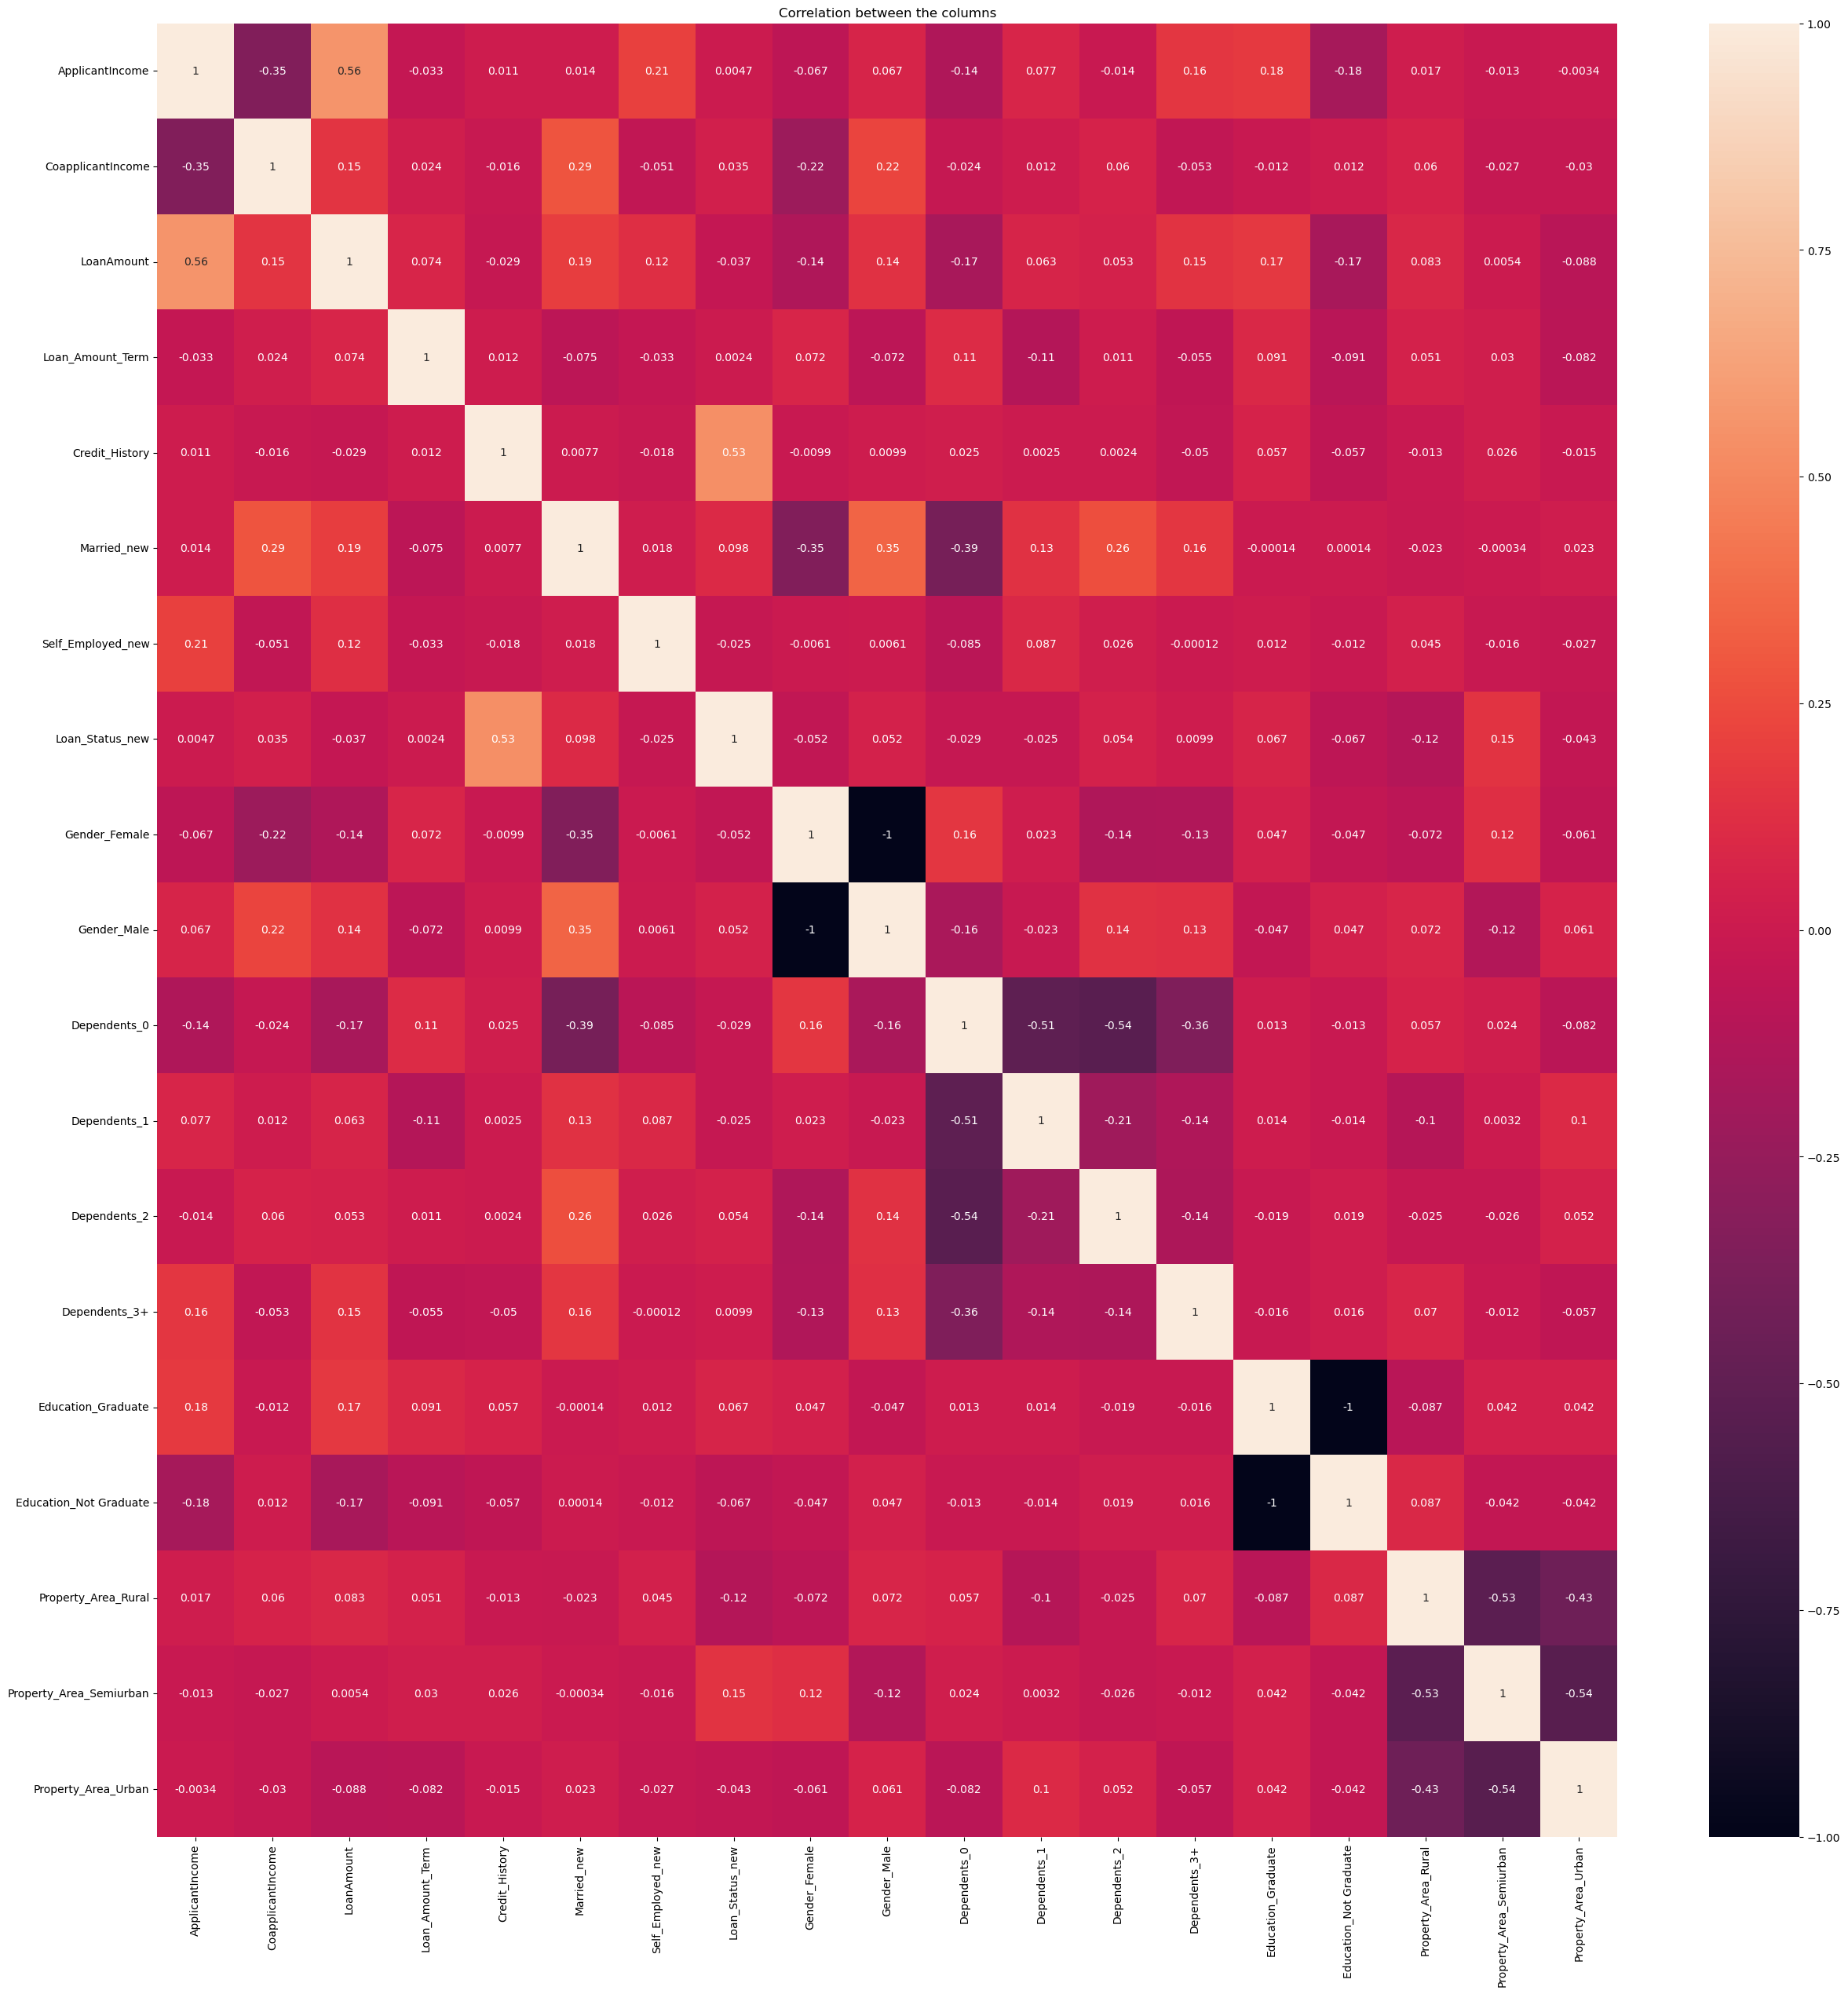

In [70]:
#Again checking for correlation
loan_cor = loan_1.corr()
plt.figure(figsize=(30,30))
sns.heatmap(loan_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

-- No Multicollinearity present between the independent features..

In [71]:
#Splitting the dataframe into feature and target variables
loan_1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_new,Self_Employed_new,Loan_Status_new,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,2.551493,11.467457,5.039684,1.923241,1.0,1,0,0,0,1,0,1,0,0,1,0,1,0,0
2,2.434147,0.000000,4.041240,1.923241,1.0,1,1,1,0,1,1,0,0,0,1,0,0,0,1
3,2.394004,13.310098,4.932424,1.923241,1.0,1,0,1,0,1,1,0,0,0,0,1,0,0,1
4,2.629024,0.000000,5.204828,1.923241,1.0,0,0,1,0,1,1,0,0,0,1,0,0,0,1
5,2.599334,16.129163,6.439277,1.923241,1.0,1,1,1,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.424995,0.000000,4.140818,1.923241,1.0,0,0,1,1,0,1,0,0,0,1,0,1,0,0
610,2.520525,0.000000,3.419952,1.780680,1.0,1,0,1,0,1,0,0,0,1,1,0,1,0,0
611,2.717121,6.214465,6.324704,1.923241,1.0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
612,2.698320,0.000000,5.718479,1.923241,1.0,1,0,1,0,1,0,0,1,0,1,0,0,0,1


In [72]:
y = loan_1['Loan_Status_new']
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_new, Length: 517, dtype: int64

In [73]:
y.value_counts()

1    360
0    157
Name: Loan_Status_new, dtype: int64

-- As there is significant difference in the classes, we we shall be performing some oversampling technique (SMOTE) to make the data balanced.

In [74]:
x = loan_1.drop("Loan_Status_new",axis=1)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_new,Self_Employed_new,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,2.551493,11.467457,5.039684,1.923241,1.0,1,0,0,1,0,1,0,0,1,0,1,0,0
2,2.434147,0.000000,4.041240,1.923241,1.0,1,1,0,1,1,0,0,0,1,0,0,0,1
3,2.394004,13.310098,4.932424,1.923241,1.0,1,0,0,1,1,0,0,0,0,1,0,0,1
4,2.629024,0.000000,5.204828,1.923241,1.0,0,0,0,1,1,0,0,0,1,0,0,0,1
5,2.599334,16.129163,6.439277,1.923241,1.0,1,1,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.424995,0.000000,4.140818,1.923241,1.0,0,0,1,0,1,0,0,0,1,0,1,0,0
610,2.520525,0.000000,3.419952,1.780680,1.0,1,0,0,1,0,0,0,1,1,0,1,0,0
611,2.717121,6.214465,6.324704,1.923241,1.0,1,0,0,1,0,1,0,0,1,0,0,0,1
612,2.698320,0.000000,5.718479,1.923241,1.0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x))

In [76]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.075866,0.580916,-0.087017,0.285095,0.408709,0.743339,-0.392451,-0.468337,0.468337,-1.152748,2.254407,-0.465264,-0.308770,0.501813,-0.501813,1.542428,-0.810587,-0.666434
1,-0.543508,-1.048672,-1.227839,0.285095,0.408709,0.743339,2.548088,-0.468337,0.468337,0.867492,-0.443576,-0.465264,-0.308770,0.501813,-0.501813,-0.648328,-0.810587,1.500524
2,-0.755388,0.842765,-0.209572,0.285095,0.408709,0.743339,-0.392451,-0.468337,0.468337,0.867492,-0.443576,-0.465264,-0.308770,-1.992775,1.992775,-0.648328,-0.810587,1.500524
3,0.485087,-1.048672,0.101676,0.285095,0.408709,-1.345282,-0.392451,-0.468337,0.468337,0.867492,-0.443576,-0.465264,-0.308770,0.501813,-0.501813,-0.648328,-0.810587,1.500524
4,0.328377,1.243370,1.512156,0.285095,0.408709,0.743339,2.548088,-0.468337,0.468337,-1.152748,-0.443576,2.149317,-0.308770,0.501813,-0.501813,-0.648328,-0.810587,1.500524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.591813,-1.048672,-1.114061,0.285095,0.408709,-1.345282,-0.392451,2.135214,-2.135214,0.867492,-0.443576,-0.465264,-0.308770,0.501813,-0.501813,1.542428,-0.810587,-0.666434
513,-0.087591,-1.048672,-1.937722,-2.159643,0.408709,0.743339,-0.392451,-0.468337,0.468337,-1.152748,-0.443576,-0.465264,3.238655,0.501813,-0.501813,1.542428,-0.810587,-0.666434
514,0.950078,-0.165563,1.381245,0.285095,0.408709,0.743339,-0.392451,-0.468337,0.468337,-1.152748,2.254407,-0.465264,-0.308770,0.501813,-0.501813,-0.648328,-0.810587,1.500524
515,0.850842,-1.048672,0.688573,0.285095,0.408709,0.743339,-0.392451,-0.468337,0.468337,-1.152748,-0.443576,2.149317,-0.308770,0.501813,-0.501813,-0.648328,-0.810587,1.500524


In [77]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X1,y1 = sm.fit_resample(X,y)

In [78]:
y1.value_counts()

0    360
1    360
Name: Loan_Status_new, dtype: int64

In [79]:
X1.shape

(720, 18)

In [92]:
# Now, Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.20,random_state = 42)

In [93]:
print("X_train ",X_train.shape)
print("y_train ",y_train.shape)
print("X_test ",X_test.shape)
print("y_test ",y_test.shape)

X_train  (576, 18)
y_train  (576,)
X_test  (144, 18)
y_test  (144,)


### Model Training 

#### Logistic Regression 

In [94]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [95]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test,logreg_pred)
print('Test accuracy is: {:.2f}%'.format(logreg_acc*100))

Test accuracy is: 76.39%


In [96]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74        72
           1       0.73      0.85      0.78        72

    accuracy                           0.76       144
   macro avg       0.77      0.76      0.76       144
weighted avg       0.77      0.76      0.76       144



In [97]:
a = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[49 23]
 [11 61]]
TN:  49
FN:  11
TP:  61
FP:  23


#### Decision Tree Classifier 

In [98]:
#importing necessary libraries
from sklearn.tree import DecisionTreeClassifier

In [99]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(dtree_acc*100))

Test accuracy is: 75.00%


In [100]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        72
           1       0.77      0.71      0.74        72

    accuracy                           0.75       144
   macro avg       0.75      0.75      0.75       144
weighted avg       0.75      0.75      0.75       144



In [101]:
a = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[57 15]
 [21 51]]
TN:  57
FN:  21
TP:  51
FP:  15


#### Random Forest Classifier 

In [102]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [103]:
r_f = RandomForestClassifier()
r_f.fit(X_train,y_train)
r_f_pred = r_f.predict(X_test)
r_f_acc = accuracy_score(r_f_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(r_f_acc*100))

Test accuracy is: 83.33%


In [104]:
print(classification_report(y_test,r_f_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        72
           1       0.80      0.89      0.84        72

    accuracy                           0.83       144
   macro avg       0.84      0.83      0.83       144
weighted avg       0.84      0.83      0.83       144



In [105]:
a = confusion_matrix(y_test, r_f_pred, labels=r_f.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[56 16]
 [ 8 64]]
TN:  56
FN:  8
TP:  64
FP:  16


#### Support Vector Classifier 

In [106]:
from sklearn.svm import SVC

In [107]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(svc_acc*100))

Test accuracy is: 75.00%


In [108]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.78      0.69      0.74        72
           1       0.72      0.81      0.76        72

    accuracy                           0.75       144
   macro avg       0.75      0.75      0.75       144
weighted avg       0.75      0.75      0.75       144



In [109]:
a = confusion_matrix(y_test, svc_pred, labels=svc.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[50 22]
 [14 58]]
TN:  50
FN:  14
TP:  58
FP:  22


#### K-neighbor Classifier

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(knn_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(knn_acc*100))

Test accuracy is: 79.17%


In [112]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        72
           1       0.78      0.81      0.79        72

    accuracy                           0.79       144
   macro avg       0.79      0.79      0.79       144
weighted avg       0.79      0.79      0.79       144



In [113]:
a = confusion_matrix(y_test, knn_pred, labels=knn.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[56 16]
 [14 58]]
TN:  56
FN:  14
TP:  58
FP:  16


#### Naive Bayes Classifier 

In [114]:
from sklearn.naive_bayes import GaussianNB

In [115]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(nb_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(nb_acc*100))

Test accuracy is: 71.53%


In [116]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68        72
           1       0.67      0.83      0.75        72

    accuracy                           0.72       144
   macro avg       0.73      0.72      0.71       144
weighted avg       0.73      0.72      0.71       144



In [117]:
a = confusion_matrix(y_test, nb_pred, labels=nb.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[43 29]
 [12 60]]
TN:  43
FN:  12
TP:  60
FP:  29


### Cross-Validation

In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
#Random Forest Classifier
score = cross_val_score(r_f,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,r_f_pred) - score.mean())

[0.78472222 0.75       0.86805556 0.84027778 0.90277778]
0.8291666666666666
Difference between Accuracy score and cross validation score is -  0.004166666666666763


In [121]:
#K-neighbor Classifier 
score = cross_val_score(knn,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,knn_pred) - score.mean())

[0.76388889 0.73611111 0.71527778 0.70833333 0.79861111]
0.7444444444444445
Difference between Accuracy score and cross validation score is -  0.047222222222222165


In [122]:
#Logistic Regression 
score = cross_val_score(logreg,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,logreg_pred) - score.mean())

[0.70833333 0.75694444 0.68055556 0.70833333 0.73611111]
0.7180555555555556
Difference between Accuracy score and cross validation score is -  0.04583333333333328


-- Conclusion:

From the model training and the cross val scores (of the top three models) done in the previous section, I am going to choose Random Forest Classifier (RFC) as my final model for the prediction of Loan approval Status of an applicant .

(?) - The reason I chose RFC  as my final model, is because of it's really good performance with the classification of values. The accuracy score of the model is the highest of all the classification models tested which is (83.33%) and from the classification report, we see that the precision, recall and f1 scores are well balanced and have a really good scores individually too.. And from the confusion matrix, we see that the ratio of TP and TN is really good as compared to other models.

Finally, from the cross val scores of the top 3 models (i.e Random Forest Classifier,KNN and Logistic Regression) RFC has equal accuracy scores across the five folds.

Therefore, RFC is our best and final Model.

### Plotting AUC-ROC curve 

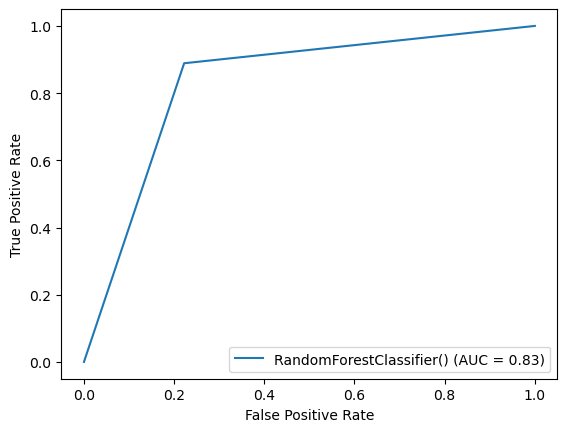

In [145]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,r_f_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=r_f)
display.plot()

### Hyper Parameter Tuning 

In [124]:
print(r_f.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [125]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'bootstrap': [True,False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
rfc = RandomForestClassifier()
random_search = RandomizedSearchCV(rfc,param_distributions=param_dist,cv=3)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]})

In [126]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_features': 2,
 'max_depth': 90,
 'bootstrap': False}

In [144]:
Final_model = RandomForestClassifier(n_estimators = 500, min_samples_split = 4,min_samples_leaf = 2,max_features = 2,max_depth = 100,bootstrap = False)
Final_model.fit(X_train,y_train)
fm_pred = Final_model.predict(X_test)
fm_acc = accuracy_score(fm_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(fm_acc*100))

Test accuracy is: 85.42%


In [147]:
print(classification_report(y_test,fm_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        72
           1       0.83      0.89      0.86        72

    accuracy                           0.85       144
   macro avg       0.86      0.85      0.85       144
weighted avg       0.86      0.85      0.85       144



In [148]:
a = confusion_matrix(y_test, fm_pred, labels=Final_model.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[59 13]
 [ 8 64]]
TN:  59
FN:  8
TP:  64
FP:  13


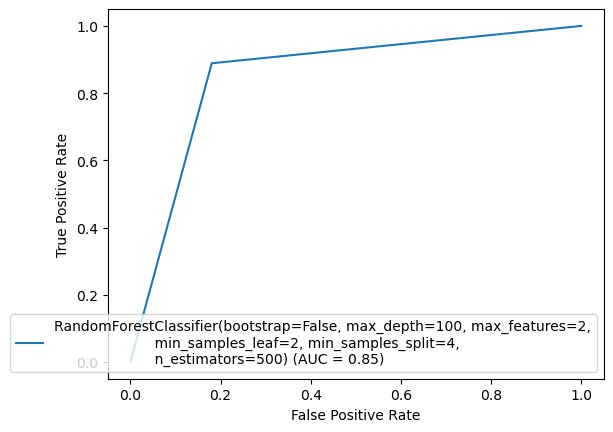

In [146]:
#AUC-ROC curve
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,fm_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

## Saving the Model 

In [149]:
import joblib
joblib.dump(Final_model,"Loan_Application_Status_Project.pkl")

['Loan_Application_Status_Project.pkl']

In [150]:
model = joblib.load("Loan_Application_Status_Project.pkl")
prediction = model.predict(X_test)
prediction

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [152]:
b

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [151]:
b = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = b
df

,Predicted,Original
0,0,1
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
139,1,1
140,0,0
141,1,0
142,0,0
